In [142]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.ticker as ticker

In [143]:
'''
1 - Abri o arquivo na forma de DataFrame
2 - Como o arquivo veio com uma coluna apenas, transformei em 7 colunas
3 - Deletei a coluna única
'''

file = pd.read_csv('COVID19.csv')
file['region'],file['sigla'],file['date'],file['cases_inc'],file['cases'],file['deaths_inc'],file['deaths']= file['region;sigla;date;cases_inc;cases;deaths_inc;deaths'].str.split(";", 7).str

del file['region;sigla;date;cases_inc;cases;deaths_inc;deaths']

<h1>Mortes por dia (BRASIL)</h1>

In [144]:
'''
1 - Pegando as colunas de interesse
2 - Transformando o número de mortes em inteiros
3 - Transformando as datas em dates
'''

microDados = file.filter(items=['date','deaths'])
microDados['deaths'] = microDados.deaths.astype('int64')
#microDados['date'] = microDados.date.astype('datetime64[D]')

In [145]:
file

,region,sigla,date,cases_inc,cases,deaths_inc,deaths
0,Norte,RO,30/01/2020,0,0,0,0
1,Norte,RO,31/01/2020,0,0,0,0
2,Norte,RO,01/02/2020,0,0,0,0
3,Norte,RO,02/02/2020,0,0,0,0
4,Norte,RO,03/02/2020,0,0,0,0
...,...,...,...,...,...,...,...
1939,Centro-Oeste,DF,06/04/2020,5,473,3,10
1940,Centro-Oeste,DF,07/04/2020,19,492,2,12
1941,Centro-Oeste,DF,08/04/2020,17,509,0,12
1942,Centro-Oeste,DF,09/04/2020,18,527,1,13


In [146]:
microDados

,date,deaths
0,30/01/2020,0
1,31/01/2020,0
2,01/02/2020,0
3,02/02/2020,0
4,03/02/2020,0
...,...,...
1939,06/04/2020,10
1940,07/04/2020,12
1941,08/04/2020,12
1942,09/04/2020,13


In [147]:
dados = microDados.groupby('date').sum()
dados

,deaths
date,
01/02/2020,0
01/03/2020,0
01/04/2020,241
02/02/2020,0
02/03/2020,0
...,...
29/03/2020,136
30/01/2020,0
30/03/2020,159


In [148]:
y = list(dados['deaths'])
y = sorted(y)
len(y)

72

In [155]:
microDados['date'].drop_duplicates(inplace=True)

In [156]:
microDados['date'].duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
67    False
68    False
69    False
70    False
71    False
Name: date, Length: 72, dtype: bool

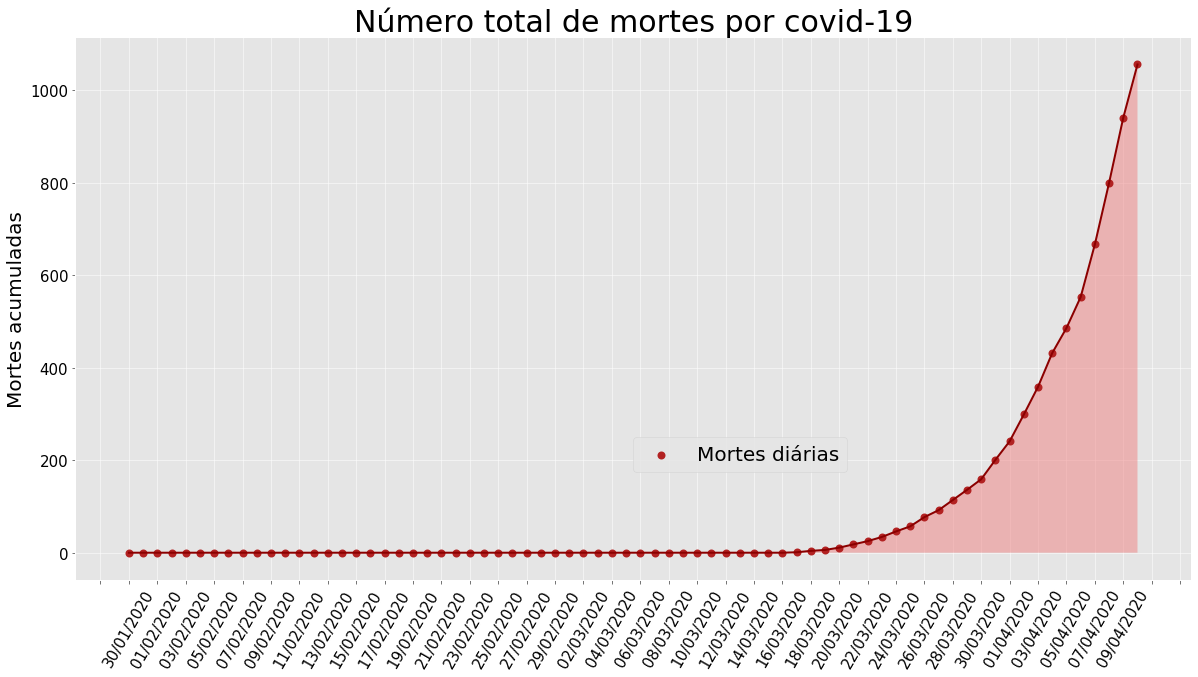

In [160]:
plt.figure(figsize = (20,10))
plt.style.use('ggplot')

#plt.bar(microDados['date'],y, color = 'lightcoral')
plt.plot(microDados['date'],y, color = 'darkred')
plt.fill_between(microDados['date'],y,facecolor='lightcoral', alpha=0.5)
plt.scatter(microDados['date'],y, color = 'firebrick',linewidths=2, label = 'Mortes diárias')

plt.title('Número total de mortes por covid-19',size=30)
plt.ylabel('Mortes acumuladas',color='black',size=20)
plt.xticks(rotation=60,size=15,color='black')
plt.yticks(size=15,color='black')
plt.rcParams.update({'font.size': 20})

ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

#plt.grid(axis='y',color='dimgrey')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=20)
plt.savefig('mortes_diarias.png')
plt.show()